<a class="anchor" id="0"></a>
# **Time Series Analysis in Python**

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

## **Import data**

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.columns = ['date','#passengers']
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
years = df['year'].unique()
df.head(15)

,date,#passengers,year,month
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5
5,1949-06-01,135,1949,6
6,1949-07-01,148,1949,7
7,1949-08-01,148,1949,8
8,1949-09-01,136,1949,9
9,1949-10-01,119,1949,10


In [6]:
def get_df():
    df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/AirPassengers.csv")
    df.columns = ['date','#passengers']
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    return df

## **Visualize the Time Series**

In [7]:
def plot_single_line(data, figsize=(7, 4), title="Air Passengers", xlabel="Timestamp", ylabel="#Passengers", fontsize=16, color="blue"):
    plt.rcParams.update({'figure.figsize': figsize})
    plt.plot(data, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=fontsize)
    plt.show()

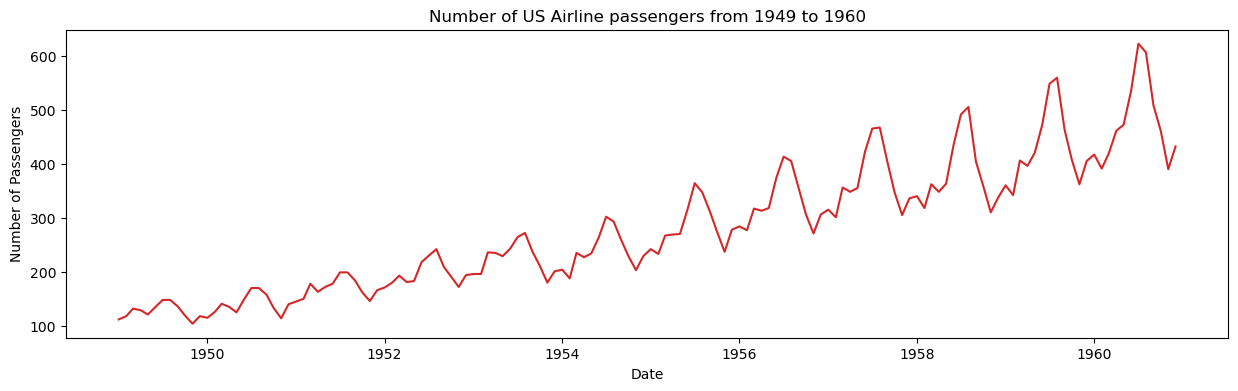

In [9]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['date'], y=df['#passengers'], title='Number of US Airline passengers from 1949 to 1960', color="tab:red")

- Vì tất cả các giá trị đều là dương, chúng ta có thể hiển thị điều này trên cả hai bên trục Y để nhấn mạnh sự tăng trưởng.

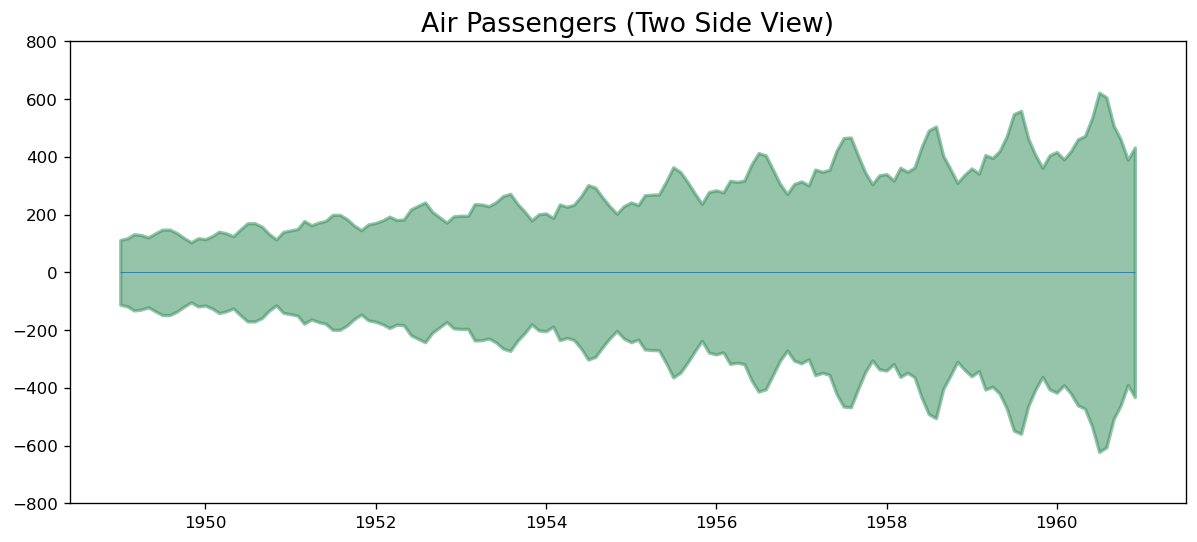

In [10]:
x = df['date'].values
y1 = df['#passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['date']), xmax=np.max(df['date']), linewidth=.5)
plt.show()

- Có thể thấy đây là một chuỗi thời gian hàng tháng và theo một mô hình lặp lại nhất định hàng năm. Vì vậy, chúng ta có thể vẽ mỗi năm thành một đường riêng biệt trên cùng một đồ thị. Điều này cho phép chúng ta so sánh các mô hình theo năm cạnh nhau.

### Seasonal Plot of a Time Series


In [53]:
df2 = df.pivot(index='month', columns='year', values='#passengers')
df2.head(12)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
1,112,115,145,171,196,204,242,284,315,340,360,417
2,118,126,150,180,196,188,233,277,301,318,342,391
3,132,141,178,193,236,235,267,317,356,362,406,419
4,129,135,163,181,235,227,269,313,348,348,396,461
5,121,125,172,183,229,234,270,318,355,363,420,472
6,135,149,178,218,243,264,315,374,422,435,472,535
7,148,170,199,230,264,302,364,413,465,491,548,622
8,148,170,199,242,272,293,347,405,467,505,559,606
9,136,158,184,209,237,259,312,355,404,404,463,508


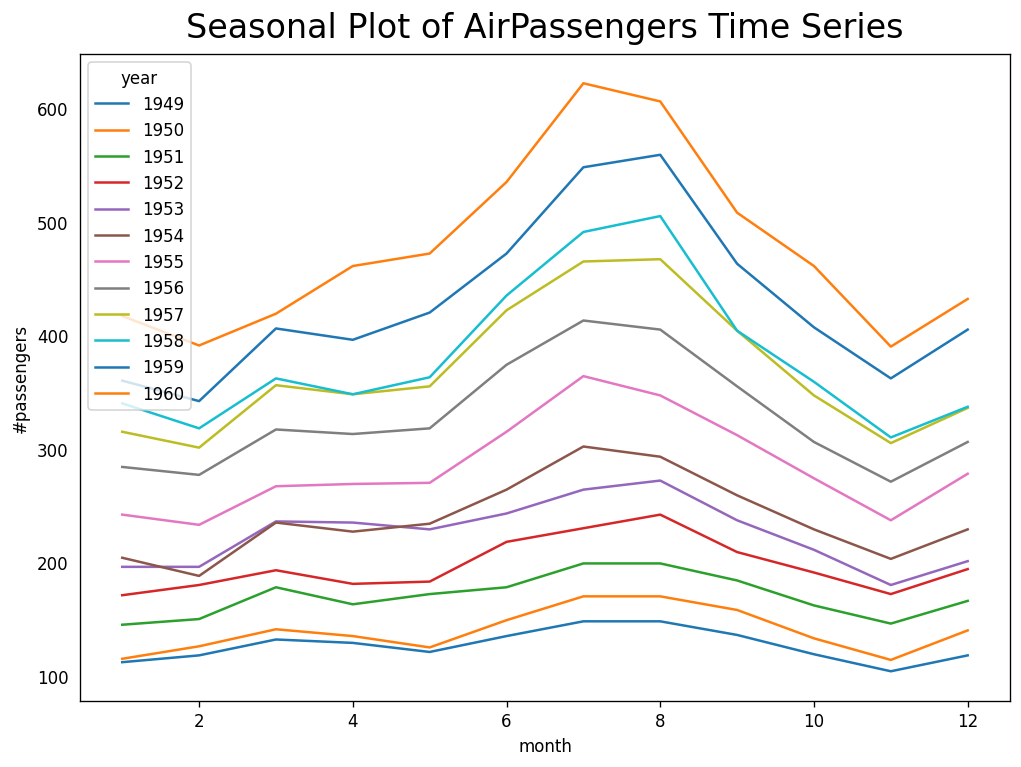

In [54]:
df2.plot()
plt.title("Seasonal Plot of AirPassengers Time Series", fontsize=20)
plt.ylabel("#passengers")
plt.show()

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

- Chúng ta có thể nhóm dữ liệu theo các khoảng thời gian mùa và xem giá trị được phân phối trong một năm hoặc tháng cụ thể và cách nó so sánh qua thời gian.

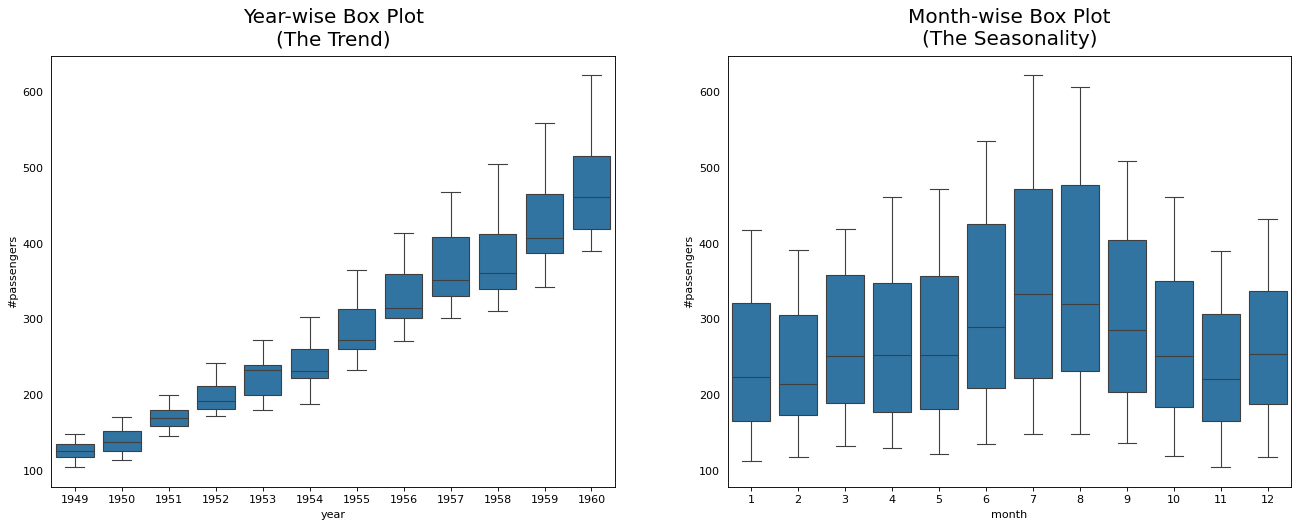

In [55]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='#passengers', data=df, ax=axes[0])
sns.boxplot(x='month', y='#passengers', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

- Các biểu đồ hộp giúp cho việc phân bố theo năm và theo tháng rõ ràng hơn. Ngoài ra, trong biểu đồ hộp theo tháng, các tháng từ 6 đến 9 rõ ràng có số lượng hành khách cao hơn, điều này có thể được quy cho mùa du lịch.


## TimeSeries Decomposition

Phân tích chuỗi thời gian bao gồm việc xem chuỗi thời gian như là sự kết hợp của các thành phần cơ bản gồm mức độ (level), xu hướng (trend), mùa (seasonality) và nhiễu (noise).


* **Level**: Giá trị trung bình của chuỗi thời gian.
* **Trend**: Giá trị gia tăng hoặc giảm dần trong chuỗi thời gian.
* **Seasonality**: Mùa ngắn hạn lặp lại trong chuỗi thời gian.
* **Noise (Error)**: Biến thiên ngẫu nhiên trong chuỗi thời gian.


Phân tán chuỗi thời gian cung cấp một mô hình trừu tượng hữu ích để suy nghĩ về chuỗi thời gian nói chung và để hiểu tốt hơn các vấn đề trong phân tích và dự báo chuỗi thời gian.

Tất cả các chuỗi đều có mức độ (level) và nhiễu (noise). Các thành phần xu hướng và mùa có thể có hoặc không.


- Hành vi chu kỳ (**Cyclic behaviour**): Điều này xảy ra khi mô hình tăng giảm trong chuỗi không xảy ra theo các khoảng thời gian cố định dựa trên lịch. Chúng ta không nên nhầm lẫn hiệu ứng "chu kỳ" (cyclic) với hiệu ứng "mùa" (seasonal).

- Nếu các mô hình không có tần suất cố định dựa trên lịch thì đó là chu kỳ. Bởi vì, khác với mùa (seasonality), các hiệu ứng chu kỳ (cyclic) thường bị ảnh hưởng bởi doanh nghiệp và các yếu tố kinh tế xã hội khác.

Việc suy nghĩ về các thành phần kết hợp theo cách cộng hay nhân có ích như sau:

* **Additive**: $y(t) = Level + Trend + Seasonality + Noise$
* **Multiplicative**: $y(t) = Level * Trend * Seasonality * Noise$

In this case we are going to use function seasonal_decompose() from the [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) library.



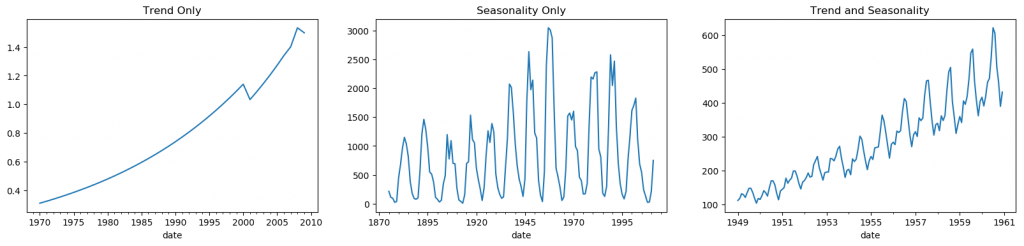

<Axes: >

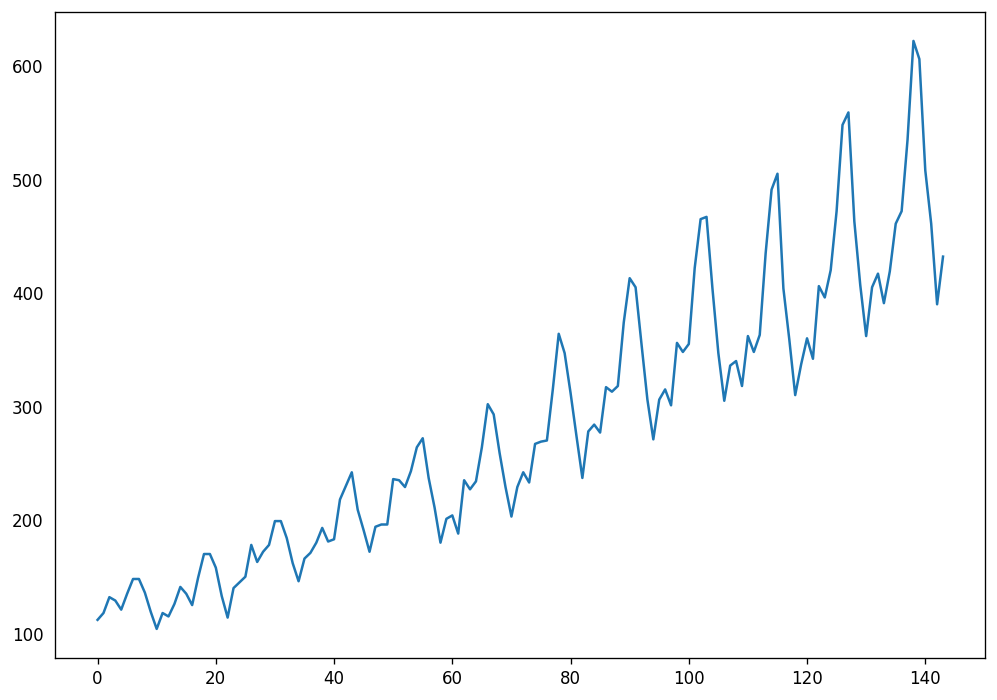

In [56]:
df = get_df()
df['#passengers'].plot()

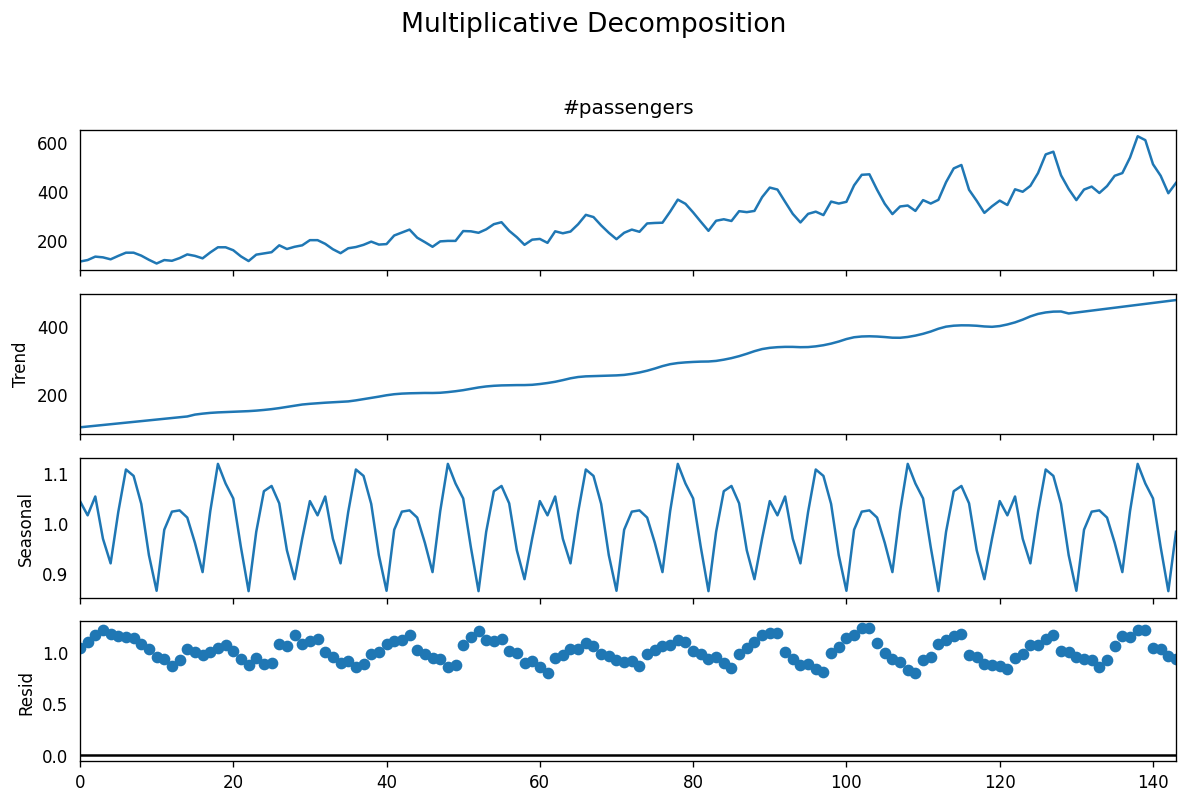

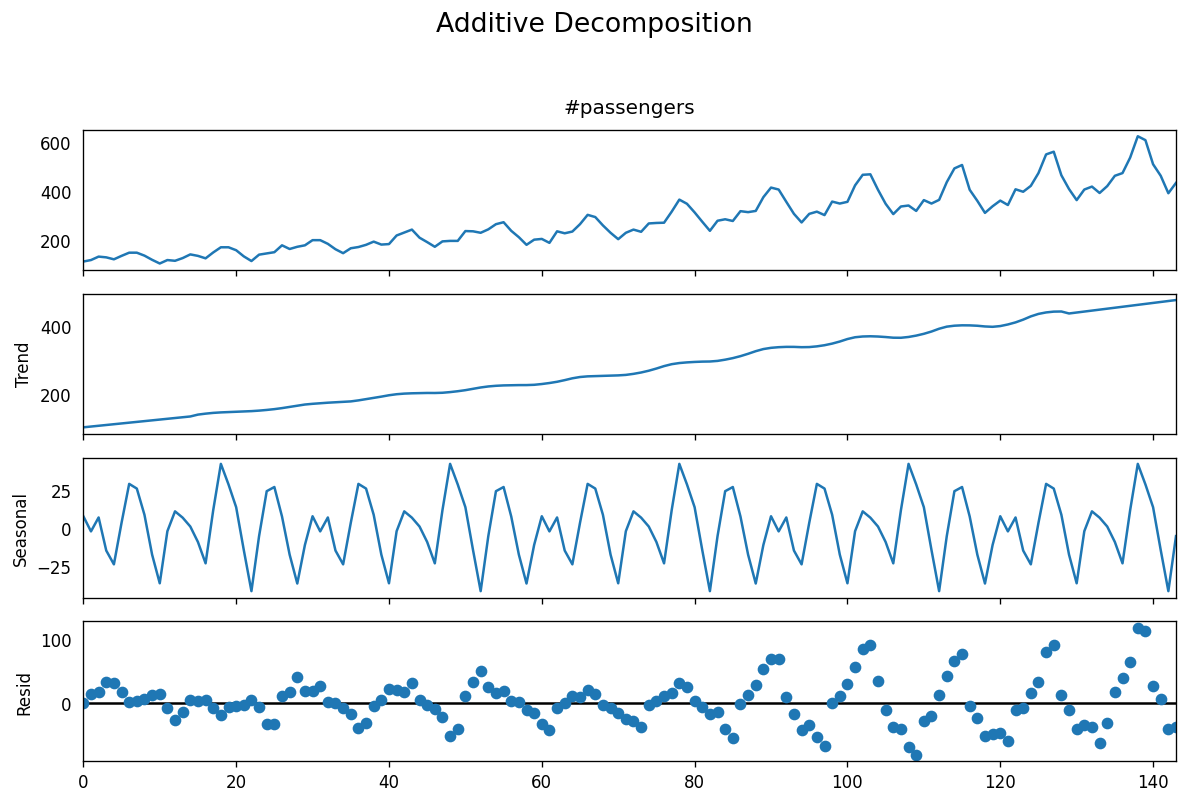

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['#passengers'], model='multiplicative', extrapolate_trend='freq', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['#passengers'], model='additive', extrapolate_trend='freq', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (10,7)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

- Đặt extrapolate_trend = 'freq' để xử lý bất kỳ giá trị bị thiếu nào trong xu hướng và phần dư ở đầu chuỗi.

- Nếu chúng ta xem xét các phần dư (residuals) của phân tích cộng, nó vẫn còn một số mẫu dư lại.

- Phân tích nhân có vẻ khá ngẫu nhiên, điều này rất tốt. Vì vậy, lý tưởng nhất là nên ưu tiên phân tích nhân cho chuỗi này.

- Đầu ra số học của các thành phần xu hướng, mùa và phần dư được lưu trữ trong chính đầu ra của phân tích nhân. Hãy trích xuất chúng và đưa vào một dataframe.

In [58]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([multiplicative_decomposition.seasonal, multiplicative_decomposition.trend,
                              multiplicative_decomposition.resid, multiplicative_decomposition.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
0,1.043184,103.702272,1.035307,112.0
1,1.014748,105.966187,1.097379,118.0
2,1.052342,108.230103,1.158962,132.0
3,0.968137,110.494018,1.205908,129.0
4,0.919078,112.757934,1.167578,121.0


**Chúng ta có thể kiểm tra rằng tích của các cột seas, trend và resid phải chính xác bằng với giá trị thực tế của chuỗi.**

## **Stationary and Non-Stationary Time Series**

- Độ tĩnh lặng (**Stationarity**) là một tính chất của chuỗi thời gian. Một chuỗi tĩnh lặng (chuỗi dừng) là một chuỗi mà giá trị của nó không phải là một hàm theo thời gian. Do đó, các giá trị độc lập với thời gian.

- Do đó, các tính chất thống kê của chuỗi như trung bình (mean), phương sai (variance) và tự tương quan (autocorrelation) là không đổi theo thời gian. Tự tương quan của chuỗi là sự tương quan của chuỗi với các giá trị trước đó.

- Một chuỗi thời gian tĩnh lặng (dừng) không phụ thuộc vào các hiệu ứng mùa vụ (seasonal).



![Stationary and Non-Stationary Time Series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1

## **Difference between white noise and a stationary series**

- Tương tự như một chuỗi dừng (stationary), tạp âm (white noise) cũng không phải là một hàm của thời gian. Vì vậy, giá trị trung bình và phương sai của nó không thay đổi theo thời gian.

- Nhưng khác biệt là, tạp âm là hoàn toàn ngẫu nhiên với trung bình bằng 0. Trong tạp âm, không có hình mẫu nào. Có nghĩa là không có mô hình toán học nào để mô tả được tạp âm.

- Theo toán học, một chuỗi số hoàn toàn ngẫu nhiên với trung bình bằng không được gọi là tạp âm.


<Axes: title={'center': 'Random White Noise'}>

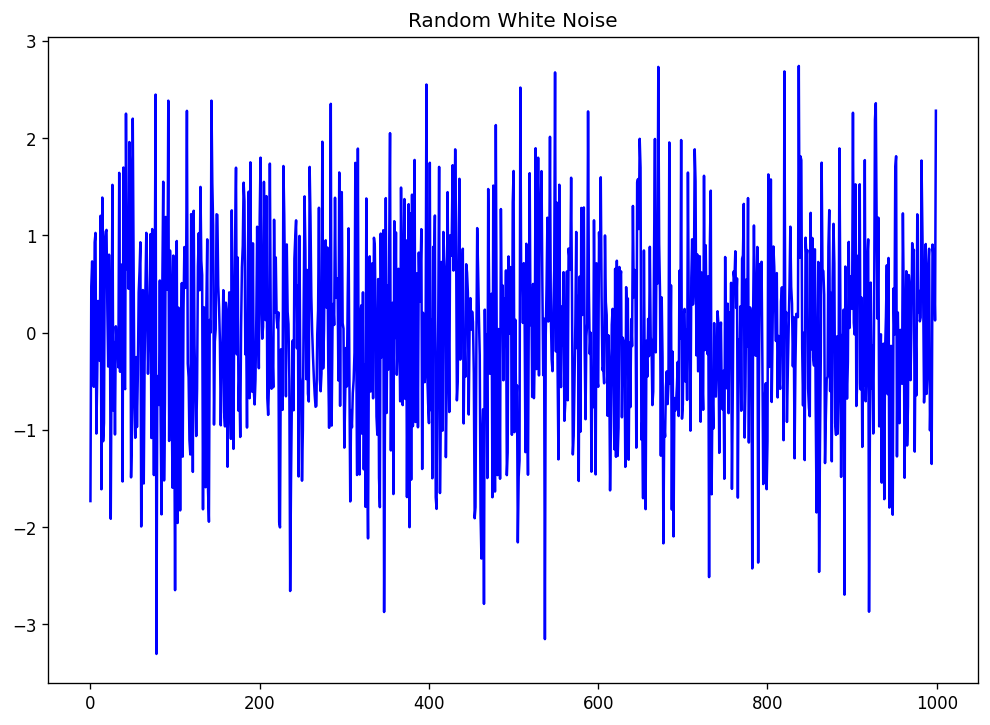

In [18]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

## Why Stationary Time-series?

- Stationary: ổn định, tĩnh hoặc dừng

- Chúng ta cần một chuỗi thời gian ổn định để có thể dự đoán và suy luận chính xác và đáng tin cậy hơn. Một chuỗi thời gian ổn định có các đặc tính thống kê không thay đổi theo thời gian, điều này làm cho nó dễ dàng hơn để mô hình và phân tích.

- Dễ mô hình hơn: Chuỗi thời gian có tính tĩnh thường có các tính chất thống kê không đổi qua thời gian, điều này làm cho chúng dễ dàng hơn để mô hình hóa bằng các kỹ thuật thống kê. Chuỗi thời gian không tĩnh thường đòi hỏi các mô hình phức tạp hơn, đòi hỏi phải xem xét các tính chất thống kê thay đổi theo thời gian, điều này có thể khó triển khai và hiểu.

- Dự báo chính xác: Vì chuỗi thời gian tĩnh có các tính chất thống kê ổn định qua thời gian, nên chúng thường tạo ra dự báo chính xác hơn so với chuỗi thời gian không tĩnh. Điều này bởi vì chúng ta có thể sử dụng hành vi quá khứ của chuỗi thời gian tĩnh để dự đoán hành vi tương lai của nó tốt hơn, trong khi đó điều này khó khăn hơn đối với chuỗi thời gian không tĩnh.

- Ước tính tham số hiệu quả hơn: Chuỗi thời gian tĩnh có các tính chất thống kê không đổi qua thời gian, điều này có nghĩa là các tham số ước tính từ một phần của chuỗi thời gian có thể hợp lệ cho các phần khác của chuỗi thời gian. Điều này có thể dẫn đến các ước tính tham số hiệu quả và đáng tin cậy hơn so với chuỗi thời gian không tĩnh, trong đó các tham số có thể thay đổi theo thời gian.

- Ví dụ, nếu chúng ta đang cố gắng dự đoán các giá trị trong tương lai của một chuỗi thời gian không ổn định, chúng ta có thể gặp phải các vấn đề như thay đổi trung bình hoặc phương sai theo thời gian, điều này có thể dẫn đến các dự đoán không chính xác. Ngược lại, nếu chúng ta có một chuỗi thời gian ổn định, chúng ta có thể tự tin hơn khi sử dụng các phương pháp và mô hình thống kê để dự đoán và suy luận.

- Do đó, chúng ta thường chuyển đổi các chuỗi thời gian không ổn định thành các chuỗi thời gian ổn định trước khi sử dụng chúng để mô hình và phân tích.


## **How to test for stationarity?**


- Phương pháp đầu tiên là nhìn vào biểu đồ của chuỗi thời gian.

- Một phương pháp khác là chia chuỗi thành 2 hoặc nhiều phần liên tục và tính toán các thống kê tóm tắt như trung bình, phương sai và tự tương quan. Nếu các thống kê này khá khác nhau, thì chuỗi không có khả năng là stationary.

- Một phương pháp khác là sử dụng các kiểm tra thống kê gọi là Kiểm tra đơn vị gốc [Unit Root Tests](https://en.wikipedia.org/wiki/Unit_root). Kiểm tra này kiểm tra xem một chuỗi thời gian có phải non-stationary và có chứa đơn vị gốc (unit root) hay không. Có nhiều phương pháp thực hiện kiểm tra đơn vị gốc như:


**1. Augmented Dickey Fuller test (ADF Test)**

**2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

**3. Philips Perron test (PP Test)**


Link tham khảo:

https://github.com/2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python



### **Unit Root Test**

- Unit root là một đặc tính của chuỗi thời gian làm cho nó không ổn định. Và ADF test thuộc loại kiểm tra unit root. Kỹ thuật kiểm tra unit root dựa trên giả định rằng chuỗi thời gian có thể được mô tả bởi phương trình AR (autoregressive) với một hệ số gốc alpha. Theo đó, một unit root được xem là tồn tại trong chuỗi thời gian nếu giá trị của hệ số alpha bằng 1 trong phương trình AR sau:


$Y_t = 	\alpha Y_{t-1} + 	\beta X_{e} + \epsilon $

Trong đó, Yt là giá trị của chuỗi thời gian tại thời điểm ‘t’ và Xe là một biến ngoại lai.


**Sự hiện diện của một đơn vị gốc đồng nghĩa với việc chuỗi thời gian là không ổn định (non-stationary)**.


### **Augmented Dickey Fuller test (ADF Test)**

- ADF test là một loại kiểm định thống kê được gọi là kiểm định gốc đơn vị (unit root test). Gốc đơn vị là một nguyên nhân của không ổn định (non-stationary).

- Chúng ta giả định rằng giả thuyết không (null hypothesis) là chuỗi thời gian có gốc đơn vị và không ổn định. Sau đó, chúng ta thu thập chứng cứ để ủng hộ hoặc bác bỏ giả thuyết không. Do đó, nếu chúng ta phát hiện ra rằng giá trị p trong kiểm định ADF nhỏ hơn mức ý nghĩa (0,05), chúng ta sẽ bác bỏ giả thuyết không.


* **Null Hypothesis (H0)**: Chuỗi thời gian có đặc điểm unit root. (Chuỗi thời gian không ổn định).

* **Alternate Hypothesis (H1)**: Chuỗi thời gian không có đặc điểm unit root. (Chuỗi thời gian ổn định).


**Nếu giả thuyết không (null hypothesis) là sai hay bị bác bỏ, thì chúng ta có thể kết luận rằng chuỗi thời gian là stationary. Có 2 cách để bác bỏ giải thuyết null**


Cách 1, giả thuyết không có thể bị bác bỏ nếu giá trị p nhỏ hơn một mức ý nghĩa (significance level) đã được thiết lập trước. Mức ý nghĩa mặc định là 5%.


* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Không thể bác bỏ giả thuyết không (H0), dữ liệu có một đường gốc đơn vị (unit root ) và <font color='red'>không ổn định (non-stationary)</font>.  

* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Bác bỏ được giải thuyết không (H0), dữ liệu không có unit root và <font color='green'>ổn định (stationary)</font>.


Cách 2, giả thiết không bác bỏ được nếu giá trị thống kê (test statistic) nhỏ hơn giá trị ngưỡng (critical value).


* <font color='red'>**ADF statistic > critical value**</font>: Không thể bác bỏ giả thuyết không (H0), dữ liệu có một đường gốc đơn vị (unit root ) và <font color='red'>không ổn định (non-stationary)</font>.  

* <font color='green'>**ADF statistic < critical value**</font>: Bác bỏ được giải thuyết không (H0), dữ liệu không có unit root và <font color='green'>ổn định (stationary)</font>.


https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

https://machinelearningmastery.com/time-series-data-stationary-python/

http://www.insightsbot.com/augmented-dickey-fuller-test-in-python/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html

https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/



In [59]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

df = get_df()
result = adfuller(df['#passengers'].values)
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Bây giờ, chúng ta sẽ kiểm tra:

* Giá trị p (p-value) nhỏ hơn 0,05
* Kiểm tra phạm vi của thống kê ADF (ADF statistic) so với các giá trị ngưỡng (critical_values)




### **Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

- Kiểm định KPSS được sử dụng để kiểm tra tính ổn định của xu hướng. Giả thuyết không và cách giải thích giá trị P-Value trái ngược hoàn toàn với kiểm định ADF.


https://en.wikipedia.org/wiki/KPSS_test

https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

https://www.statisticshowto.com/kpss-test/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-kpss.html



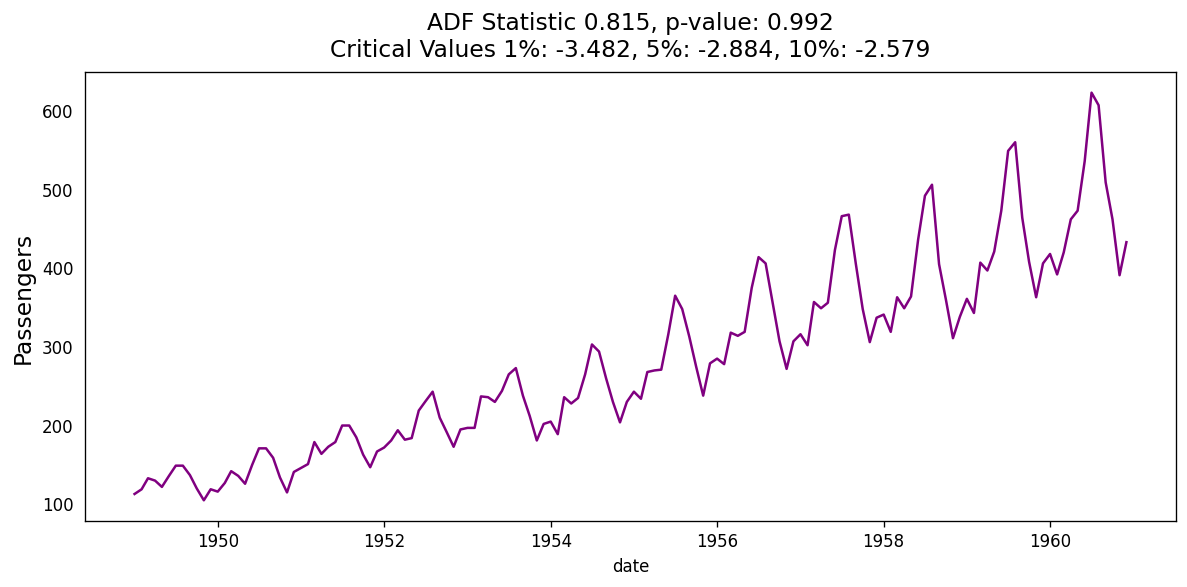

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi= 120)

def visualize_adfuller_results(series, title, ax, df_date=None):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df_date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['#passengers'].values, 'Passengers', ax, df['date'])
plt.tight_layout()
plt.show()

### **Philips Perron test (PP Test)**

- Bài kiểm định Philips Perron hoặc PP là một bài kiểm định đơn vị gốc. Nó được sử dụng trong phân tích chuỗi thời gian để kiểm tra giả thuyết không có đơn vị gốc của chuỗi thời gian có cấp là 1. Nó được xây dựng trên bài kiểm định ADF đã được thảo luận ở trên.


https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test

https://www.mathworks.com/help/econ/pptest.html

https://people.bath.ac.uk/hssjrh/Phillips%20Perron.pdf

https://www.stata.com/manuals13/tspperron.pdf



## **How to make a time series stationary?**



- Nếu dữ liệu không ổn định nhưng chúng ta muốn sử dụng một mô hình thống kê như ARIMA (hầu hết các phương pháp dự báo thống kê được thiết kế để làm việc trên chuỗi thời gian ổn định).

- Bước đầu tiên trong quá trình dự báo thường là thực hiện một số biến đổi để chuyển đổi chuỗi không ổn định thành chuỗi ổn định.

Một số phương pháp phổ biến nhất để chuyển đổi chuỗi thành chuỗi ổn định là:


* **Differencing**: lấy hiệu của giá trị hiện tại với giá trị liền trước nó (một hoặc nhiều lần)

* **Transformation**: ví dụ như lấy log hoặc căn bậc hai để ổn định giá trị của phương sai (làm cho giá trị phương sai không bị thay đổi theo thời gian).

* **Detrend**: Nó có nghĩa là loại bỏ thành phần xu hướng (trend) từ chuỗi thời gian.

* **Deseasonalize**: loại bỏ mùa vụ (deseasonalize) trong chuỗi thời gian

* **Combination**: Kết hợp nhiều phương pháp bên trên


Phương pháp phổ biến nhất và tiện lợi nhất để chuyển chuỗi dữ liệu về stationary là sử dụng phương pháp differencing, thường là lấy hiệu của giá trị hiện tại với giá trị liền trước đó ít nhất một lần, cho đến khi chuỗi dữ liệu trở nên ổn định.



**Lý do để chuyển đổi một chuỗi không ổn định thành một chuỗi ổn định trước khi dự báo**

- Dự báo một chuỗi ổn định tương đối dễ dàng hơn và dự báo có độ tin cậy cao hơn.

- Một lý do quan trọng là, các mô hình dự báo tự hồi quy là các mô hình hồi quy tuyến tính sử dụng độ trễ (lags) của chuỗi làm dự đoán.

- Chúng ta biết rằng hồi quy tuyến tính hoạt động tốt nhất nếu các biến dự đoán (biến X) không tương quan với nhau. Vì vậy, việc ổn định chuỗi giải quyết vấn đề này vì nó loại bỏ bất kỳ tương quan tự hồi quy nào, do đó làm cho các biến dự đoán (độ trễ của chuỗi) trong các mô hình dự báo gần như độc lập.



### **Differencing**

Việc lấy sai khác (Differencing) có thể được thực hiện ở các mức khác nhau:

* Sai khác bậc nhất (First order differencing): xu hướng tuyến tính với $z_i = y_i - y_{i-1}$
* Sai khác bậc hai (Second-order differencing): xu hướng bậc hai với quadratic trends with $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
* and so on...

Nếu Y_t là giá trị tại thời điểm t, thì sai khác bậc nhất của Y = Yt - Yt-1. Nói đơn giản, sai khác của chuỗi là sự khác nhau giữa giá trị kế tiếp và giá trị hiện tại. Nếu sai khác bậc nhất không làm cho chuỗi trở nên stationary, chúng ta có thể sử dụng sai khác bậc hai và tiếp tục như vậy.


Ví dụ, xét chuỗi sau: [1, 5, 2, 12, 20]

- Sai khác bậc nhất: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

- Sai khác bậc hai: [-3-4, 10+3, 8-10] = [-7, 13, -2]




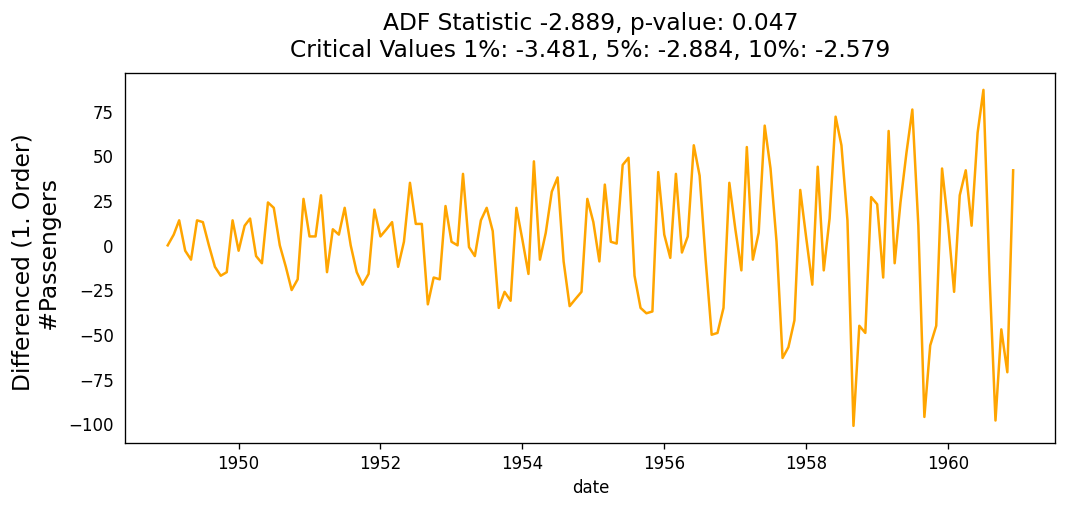

In [94]:
import numpy as np

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
visualize_adfuller_results(df['#passengers_diff1'], 'Differenced (1. Order) \n #Passengers', ax, df['date'])

### Transforming

- Phép biến đổi Log của giá trị tuyệt đối: Lưu ý rằng phép biến đổi Log của các giá trị âm sẽ trả về NaN.


<ipython-input-95-ef2e92625e7f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['#passengers_log1'], ax=ax[1])


<Axes: xlabel='#passengers_log1', ylabel='Density'>

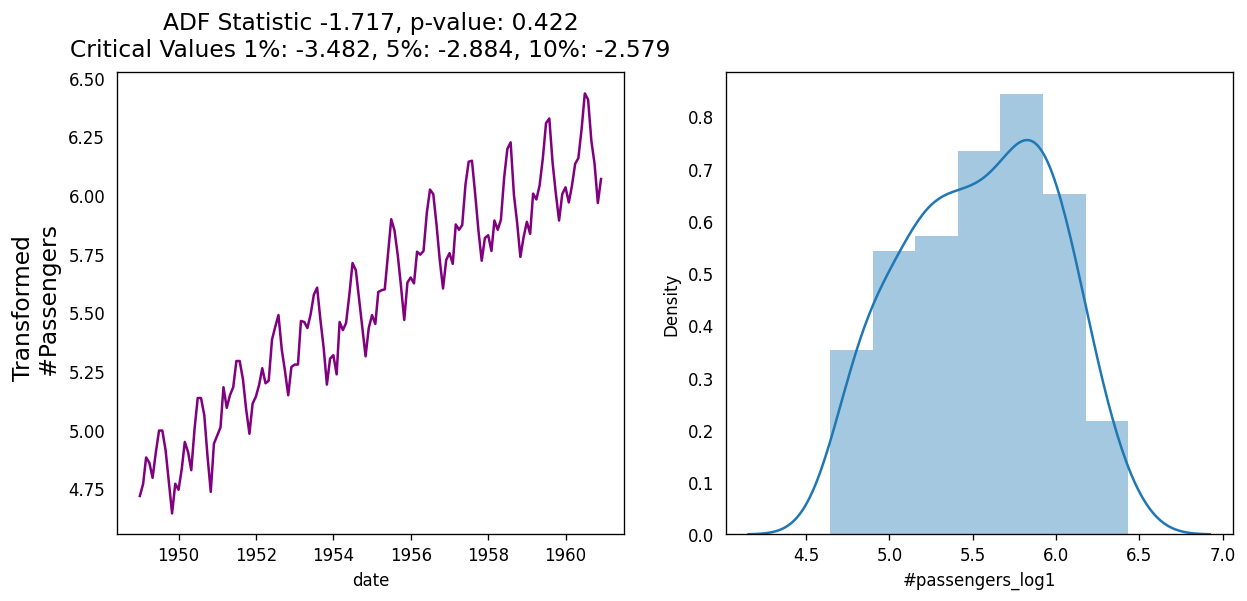

In [95]:
df = get_df()
df['#passengers_log1'] = np.log(abs(df['#passengers']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
visualize_adfuller_results(df['#passengers_log1'], 'Transformed \n #Passengers', ax[0], df['date'])

sns.distplot(df['#passengers_log1'], ax=ax[1])

<ipython-input-96-b7621cc7c380>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['#passengers_sqrt'], ax=ax[1])


<Axes: xlabel='#passengers_sqrt', ylabel='Density'>

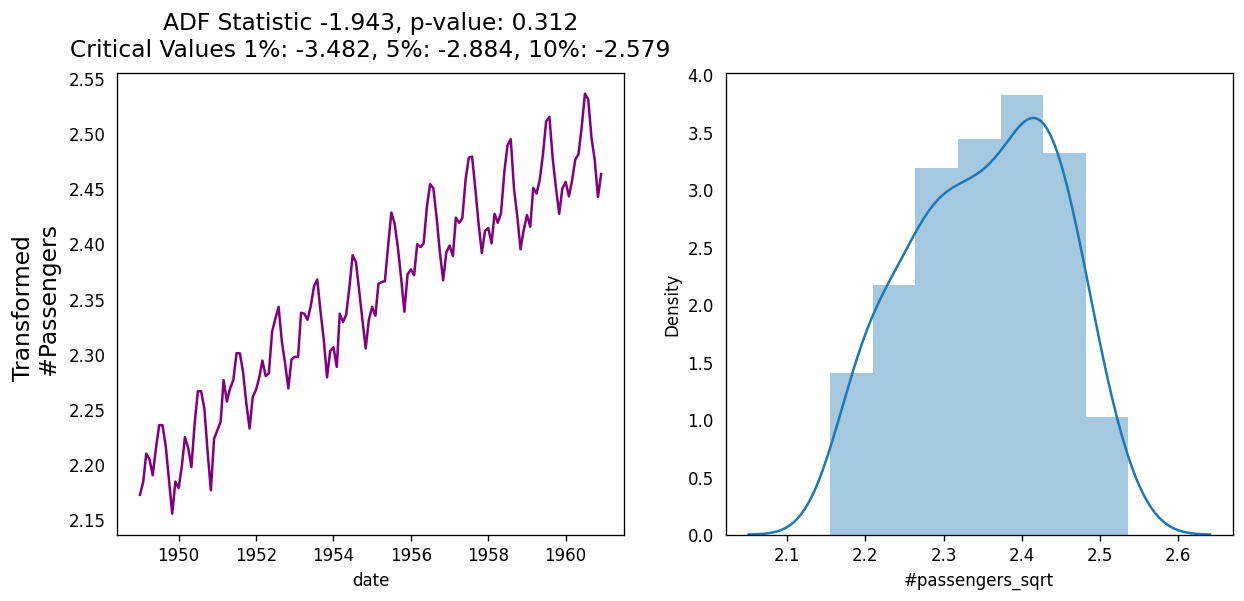

In [96]:
df = get_df()
df['#passengers_sqrt'] = np.sqrt(np.log(abs(df['#passengers'])))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
visualize_adfuller_results(df['#passengers_sqrt'], 'Transformed \n #Passengers', ax[0], df['date'])

sns.distplot(df['#passengers_sqrt'], ax=ax[1])

### **Detrend**

Nó có nghĩa là loại bỏ thành phần xu hướng (trend) từ chuỗi thời gian. Có nhiều cách để thực hiện điều này như sau:

1. Trừ đường thẳng phù hợp nhất từ chuỗi thời gian. Đường thẳng phù hợp nhất có thể được tính từ một mô hình hồi quy tuyến tính với các bước thời gian làm biến đổi. Đối với các xu hướng phức tạp hơn, chúng ta có thể sử dụng các thuật ngữ bậc hai (x^2) trong mô hình.

2. Chúng ta trừ đi thành phần xu hướng (trend) được lấy từ phân tích chuỗi thời gian.

3. Trừ đi giá trị trung bình (mean).

4. Áp dụng bộ lọc như Baxter-King filter (statsmodels.tsa.filters.bkfilter) hoặc Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) để loại bỏ các đường xu hướng trung bình di động hoặc các thành phần chu kỳ.

Bây giờ, chúng ta sẽ thực hiện hai phương pháp đầu tiên để loại bỏ xu hướng từ chuỗi thời gian.


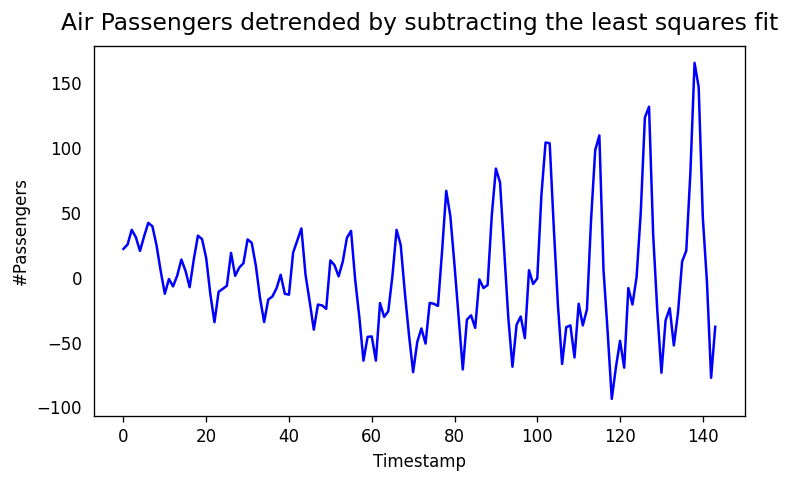

In [98]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = get_df()
detrended = signal.detrend(df['#passengers'].values)
plot_single_line(detrended, title='Air Passengers detrended by subtracting the least squares fit', fontsize=14)

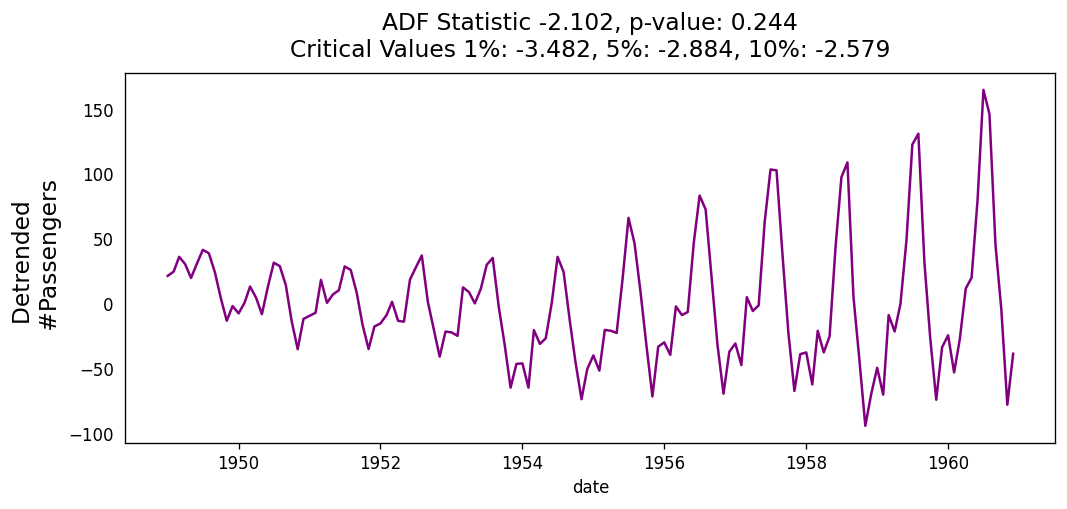

In [99]:
## Check for stationary data
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
visualize_adfuller_results(detrended, 'Detrended \n #Passengers', ax, df['date'])

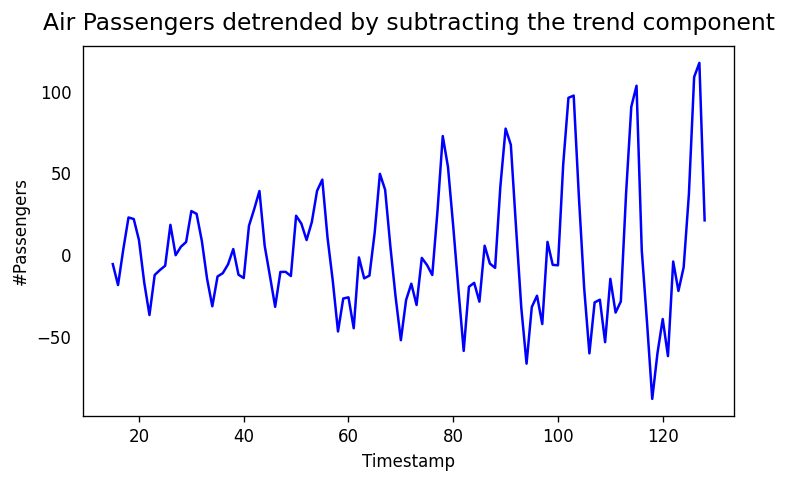

In [100]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
df = get_df()
result_mul = seasonal_decompose(df['#passengers'].values, model='multiplicative', period=30)
detrended = df['#passengers'].values - result_mul.trend
plot_single_line(detrended, title='Air Passengers detrended by subtracting the trend component', fontsize=14)

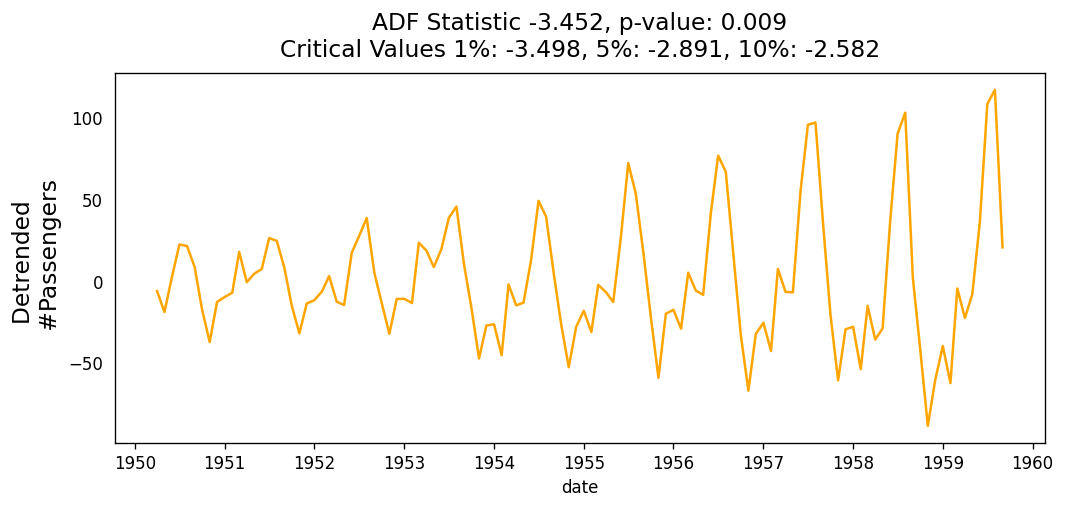

In [101]:
## Check for stationary data
import numpy as np
df["detrended"] = detrended
df = df[~np.isnan(df["detrended"])]     # Note: Remove NaN value to calculate ADF, the series is now shorten than before.

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
visualize_adfuller_results(df["detrended"].values, 'Detrended \n #Passengers', ax, df["date"])

### **Deseasonalize**

Có nhiều cách tiếp cận để loại bỏ mùa vụ (deseasonalize) trong chuỗi thời gian. Các phương pháp này được liệt kê dưới đây:

1. Lấy trung bình động với độ dài là cửa sổ mùa vụ (seasonal window). Điều này sẽ làm mượt chuỗi trong quá trình này.

2. Lấy sai khác mùa vụ (Seasonal difference) của chuỗi (trừ giá trị mùa trước đó khỏi giá trị hiện tại).

3. Chia chuỗi cho chỉ số mùa vụ (seasonal index) được thu được từ phân rã STL (STL decomposition).


Nếu việc chia chuỗi cho chỉ số mùa vụ không hoạt động tốt, chúng ta sẽ lấy logarit tự nhiên của chuỗi và sau đó thực hiện việc loại bỏ mùa vụ. Chúng ta sẽ phục hồi lại tỷ lệ ban đầu bằng cách lấy mũ số e.



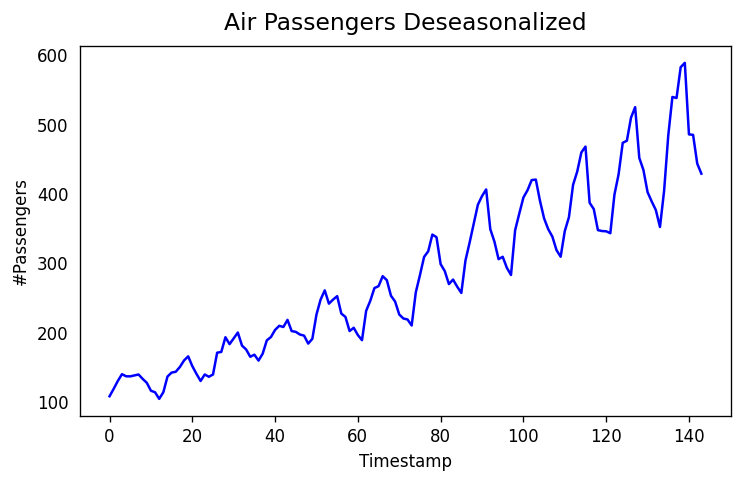

In [106]:
# Time Series Decomposition
df = get_df()
result_mul = seasonal_decompose(df['#passengers'], model='multiplicative', period=30)

# Deseasonalize
deseasonalized = df['#passengers'].values / result_mul.seasonal

# Plot
plot_single_line(deseasonalized, title='Air Passengers Deseasonalized', fontsize=14)

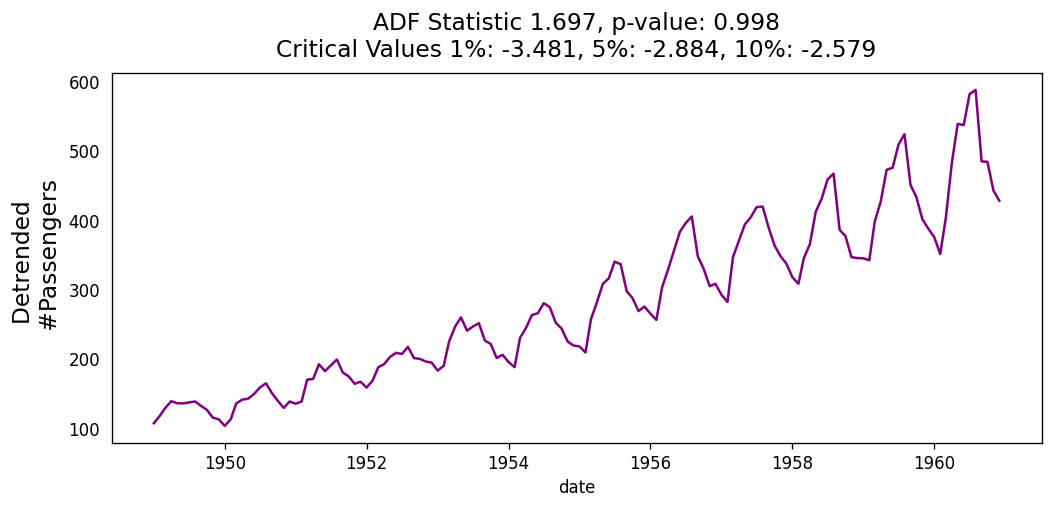

In [107]:
## Check for stationary data
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
visualize_adfuller_results(deseasonalized, 'Detrended \n #Passengers', ax, df["date"])

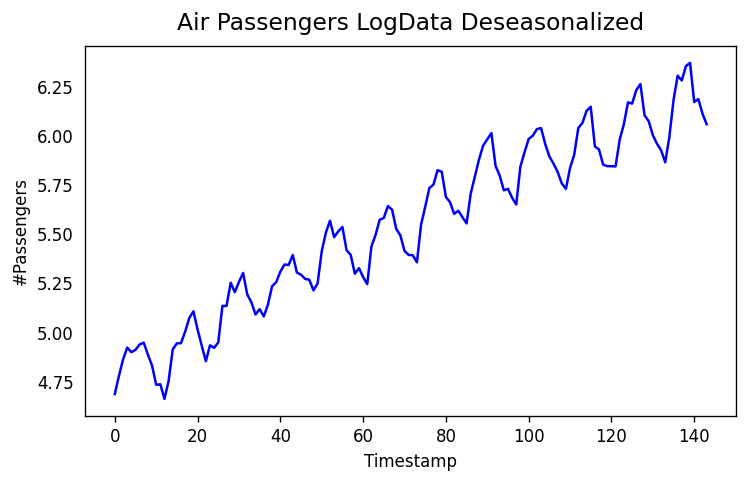

In [109]:
import numpy as np

# Time Series Decomposition
df = get_df()
df['#passengersLog'] = np.log(df['#passengers'])
result_mul2 = seasonal_decompose(df['#passengersLog'], model='multiplicative', period=30)

# Deseasonalize
deseasonalized2 = df['#passengersLog'].values / result_mul2.seasonal

# Plot
plot_single_line(deseasonalized2, title='Air Passengers LogData Deseasonalized', fontsize=14)

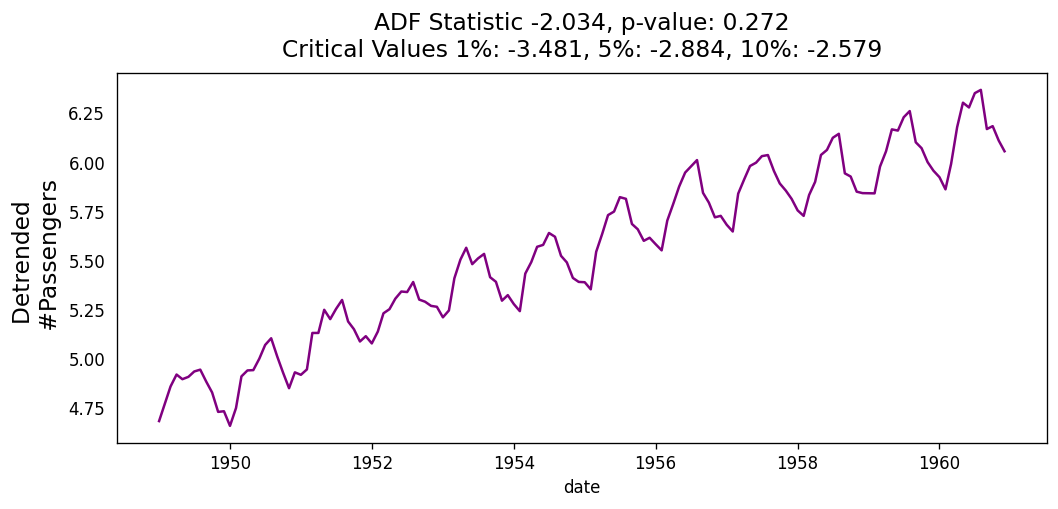

In [110]:
## Check for stationary data
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
visualize_adfuller_results(deseasonalized2, 'Detrended \n #Passengers', ax, df["date"])

## **How to test for seasonality of a time series?**

Cách thông thường để kiểm tra tính mùa vụ (seasonality) của chuỗi thời gian là vẽ biểu đồ chuỗi và kiểm tra các mẫu lặp lại trong các khoảng thời gian cố định. Vì vậy, loại mùa vụ được xác định bởi đồng hồ hoặc lịch.

1. Hour of day
2. Day of month
3. Weekly
4. Monthly
5. Yearly

Tuy nhiên, nếu chúng ta muốn kiểm tra mùa vụ một cách chính xác hơn, sử dụng đồ thị Hàm tự tương quan tự (**Autocorrelation Function (ACF) plot**). Nếu có một mô hình mùa vụ mạnh, biểu đồ ACF thường cho thấy các đỉnh lặp lại xác định tại bội số của cửa sổ mùa vụ.


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

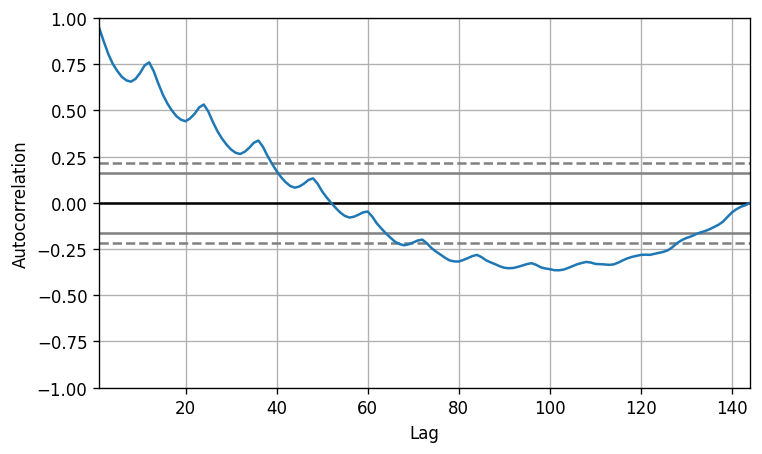

In [24]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(7, 4), 'figure.dpi':120})
autocorrelation_plot(df['#passengers'].tolist())

Mặc khác, nếu chúng ta muốn kiểm định thống kê, có thể sử dụng [CHTest](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest), nó có thể xác định nếu seasonal differencing cần được thực hiện để ổn định chuỗi


## **Autocorrelation (ACF) and Partial Autocorrelation Functions (PACF)**

- **Tự tương quan - Autocorrelation (ACF)** đơn giản là tương quan của một chuỗi với chính nó theo các độ trễ (lags) của nó. Nếu một chuỗi có tự tương quan đáng kể, điều đó có nghĩa là các giá trị trước đó của chuỗi (độ trễ) có thể hữu ích trong dự đoán giá trị hiện tại.


- **Tự tương quan riêng - Partial Autocorrelation (PACF)** cũng truyền tải thông tin tương tự nhưng nó truyền tải tương quan thuần túy của một chuỗi và độ trễ (lag) của nó, loại bỏ các đóng góp tương quan từ các độ trễ trung gian.


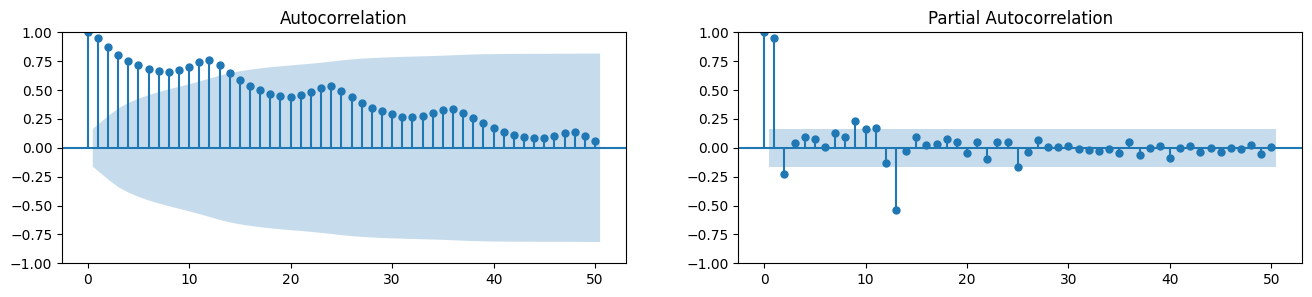

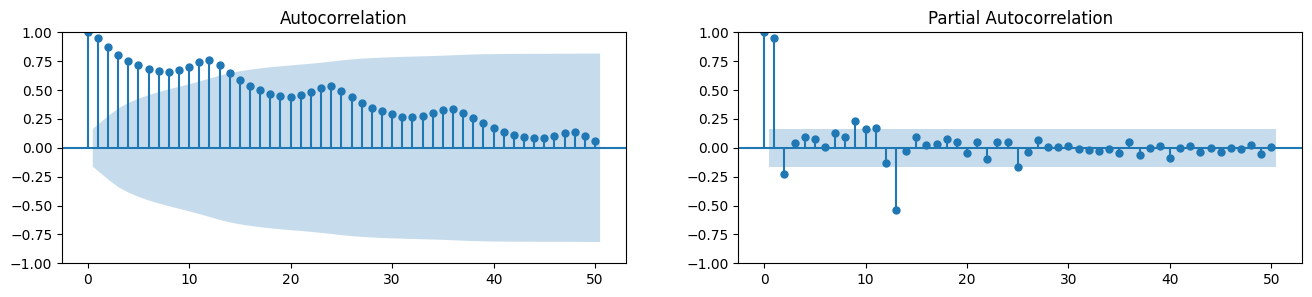

In [25]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['#passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['#passengers'].tolist(), lags=50, ax=axes[1])

### **Computation of Partial Autocorrelation Function**

- Hàm tự tương quan riêng phần (Partial Autocorrelation Function - PACF) của một chuỗi tại độ trễ (k) là hệ số của độ trễ đó trong phương trình tự hồi quy của Y.

- Phương trình tự hồi quy của Y không gì khác là một phương trình hồi quy tuyến tính của Y với các độ trễ của chính nó là các biến độc lập.

- Ví dụ, nếu **Y_t**  là chuỗi hiện tại và **Y_t-1** là độ trễ 1 của Y, thì tự tương quan riêng phần của độ trễ **lag 3 (Y_t-3)** là hệ số $\alpha_3$ của Y_t-3 trong phương trình sau:



![Partial Autocorrelation Function](https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1

### **Lag Plots**

- **Lag plot**: là một biểu đồ phân tán (scatter plot) của chuỗi thời gian so với một độ trễ của chính nó. Thông thường, nó được sử dụng để kiểm tra tính tự tương quan (autocorrelation). Nếu có bất kỳ mẫu tồn tại trong chuỗi, chuỗi đó có tính tự tương quan. Nếu không có mẫu đó, chuỗi đó có thể là nhiễu trắng ngẫu nhiên (random white noise).



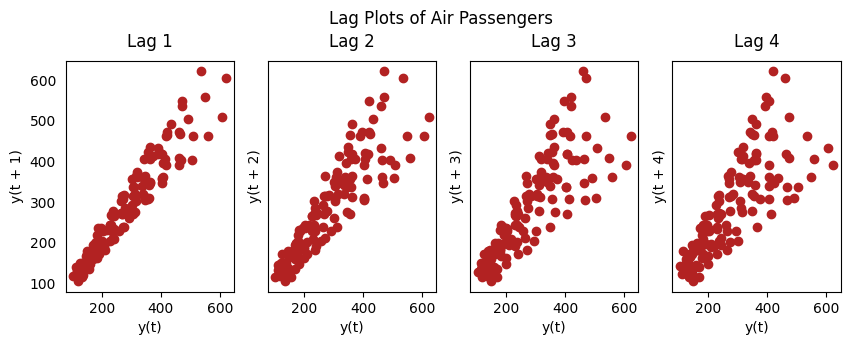

In [26]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['#passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)
plt.show()

**Trong ví dụ này, các đồ thị trở nên phân tán hơn và hơn khi số lượng lags tăng. Và các điểm trở nên rộng và phân tán hơn khi lags tăng --> tương quan giảm.**


### **Granger Causality Test**

- **Granger causality test**: Kiểm định tương quan Granger được sử dụng để xác định xem một chuỗi thời gian có hữu ích để dự báo chuỗi thời gian khác hay không. Nó dựa trên ý tưởng nếu X gây ra Y, thì việc dự báo Y dựa trên các giá trị trước của Y Và các giá trị trước của X nên cho kết quả tốt hơn việc dự báo Y chỉ dựa trên các giá trị trước của Y.

- Vì vậy, **Granger causality test** kiểm định tương quan Granger không nên được sử dụng để kiểm tra xem lag của Y có gây ra Y hay không. Thay vào đó, nó thường được sử dụng cho các biến bên ngoài (không phải lag của Y). Nó được thực hiện trong thư viện statsmodel.

- Nó chấp nhận một mảng 2D với 2 cột là đối số chính. Các giá trị nằm trong cột đầu tiên và predictor (X) nằm trong cột thứ hai.

Giả thuyết Null có là chuỗi trong cột thứ hai không gây ra Granger cho chuỗi trong cột đầu tiên. Nếu P-Values nhỏ hơn một mức ý nghĩa (0,05) thì chúng ta bác bỏ giả thuyết không và kết luận rằng lag của X đã nêu là hữu ích. Tham số maxlag cho biết tối đa bao nhiêu lags của Y nên được bao gồm trong kiểm tra.


In [27]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['#passengers', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=7.5667  , p=0.0059  , df=1
likelihood ratio test: chi2=7.3733  , p=0.0066  , df=1
parameter F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=10.3154 , p=0.0058  , df=2
likelihood ratio test: chi2=9.9579  , p=0.0069  , df=2
parameter F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2


{1: ({'ssr_ftest': (7.407967762077273, 0.007318844731632552, 140.0, 1),
   'ssr_chi2test': (7.566709928407499, 0.00594562186503604, 1),
   'lrtest': (7.373310381387228, 0.00661989587473731, 1),
   'params_ftest': (7.407967762077268, 0.007318844731632552, 140.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.976083922906452, 0.00819979590267562, 137.0, 2),
   'ssr_chi2test': (10.315385650404616, 0.0057549620839173355, 2),
   'lrtest': (9.95792312585968, 0.006881204546489823, 2),
   'params_ftest': (4.976083922906381, 0.008199795902676155, 137.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

- Trong trường hợp trên, giá trị p được tính đều nhỏ hơn 0,05 cho tất cả các bài kiểm tra. Vì vậy, cột 'month' có thể được sử dụng để dự báo các giá trị.


## **Smoothening a Time Series**

Việc làm mịn (smoothing) của một chuỗi thời gian có thể hữu ích trong những trường hợp sau:

- Giảm hiệu ứng của nhiễu trong tín hiệu để có được một ước lượng hợp lý về chuỗi đã được lọc nhiễu.

- Phiên bản được làm mịn của chuỗi có thể được sử dụng làm đặc trưng để giải thích chuỗi gốc.

- Hiển thị xu hướng cơ bản một cách tốt hơn.


Chúng ta có thể làm mịn một chuỗi thời gian bằng các phương pháp sau:

1. Lấy trung bình di động (moving average).
2. Thực hiện làm mịn LOESS (Localized Regression).
3. Thực hiện làm mịn LOWESS (Locally Weighted Regression).


### **Moving Average**


- Điểm trung bình chuyển động (Moving average) là trung bình của một cửa sổ trượt có độ rộng được xác định trước. Chúng ta phải chọn độ rộng cửa sổ khôn ngoan, bởi vì, kích thước cửa sổ lớn sẽ làm cho loại bỏ quá nhiều thông tin trong chuỗi. Ví dụ, kích thước cửa sổ bằng với độ dài mùa (ví dụ: 12 cho một chuỗi theo tháng), sẽ hiệu quả loại bỏ tác động mùa vụ.



### **Localized Regression**

- LOESS, viết tắt của ‘Localized Regression’, thực hiện việc phù hợp nhiều mô hình hồi quy trong vùng lân cận của mỗi điểm. Nó được thực hiện trong gói statsmodels, trong đó bạn có thể điều khiển mức độ làm mượt bằng đối số frac để chỉ định phần trăm điểm dữ liệu gần đó cần được xem xét để phù hợp với một mô hình hồi quy.


In [28]:
df.head(10)

,date,#passengers,year,month,#passengers_diff1,#passengers_log1,#passengers_sqrt,#passengersLog
0,1949-01-01,112,1949,1,0,4.718499,2.172211,4.718499
1,1949-02-01,118,1949,2,6,4.770685,2.184190,4.770685
2,1949-03-01,132,1949,3,14,4.882802,2.209706,4.882802
3,1949-04-01,129,1949,4,-3,4.859812,2.204498,4.859812
4,1949-05-01,121,1949,5,-8,4.795791,2.189929,4.795791
5,1949-06-01,135,1949,6,14,4.905275,2.214785,4.905275
6,1949-07-01,148,1949,7,13,4.997212,2.235445,4.997212
7,1949-08-01,148,1949,8,0,4.997212,2.235445,4.997212
8,1949-09-01,136,1949,9,-12,4.912655,2.216451,4.912655
9,1949-10-01,119,1949,10,-17,4.779123,2.186121,4.779123


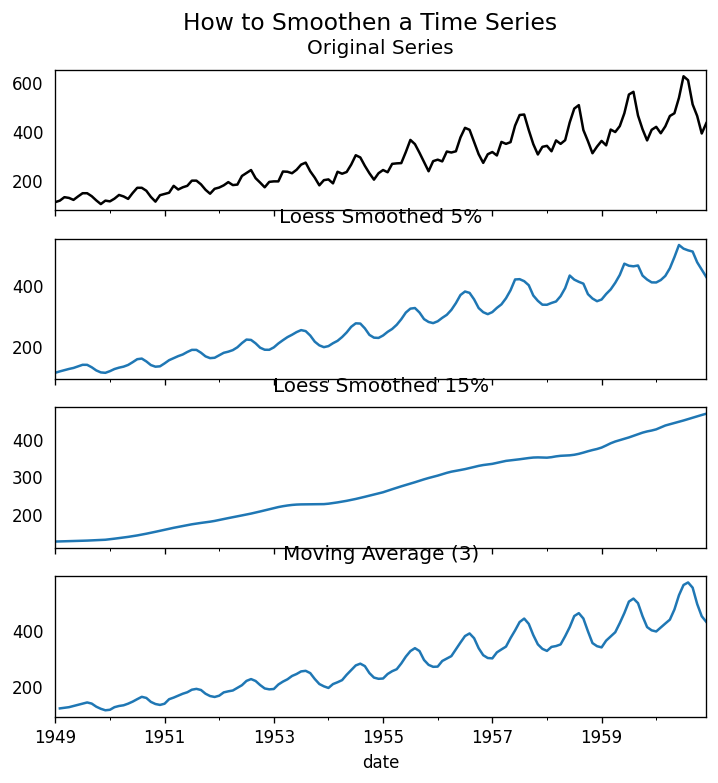

In [29]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df_orig = df[['date', '#passengers']]
df_orig.columns = ['date', 'value']
df_orig.index = df.date

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

# Data Preprocessing



In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/acea-water-prediction/Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [31]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [32]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [33]:
# Since this is a TimeSeries problem, we have to parse 'date' column
from datetime import datetime, date

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


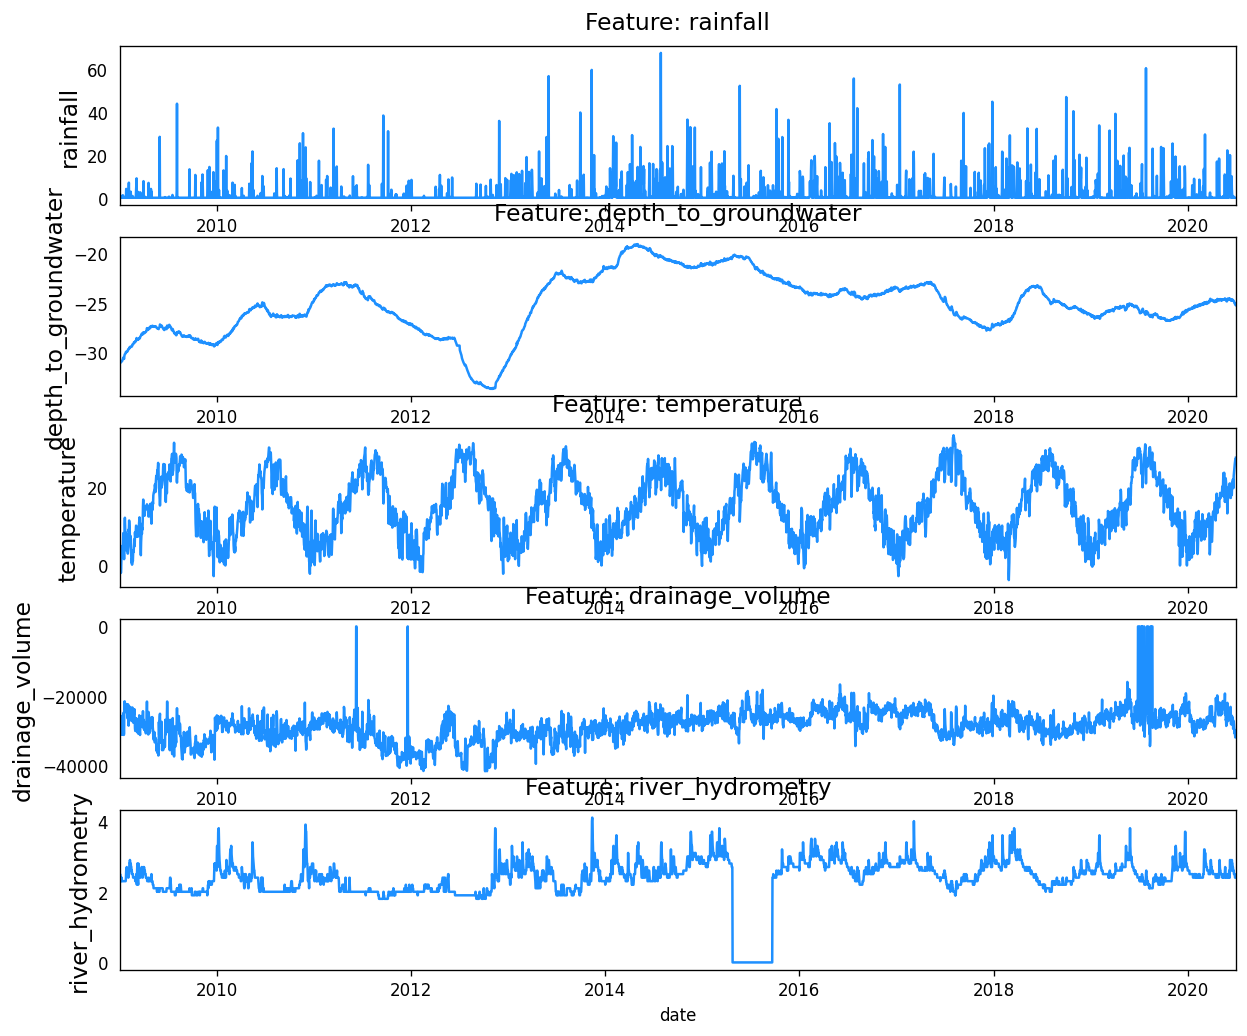

In [34]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 10))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

## Chronological Order and Equidistant Timestamps

- Kiểm tra thứ tự và khoảng cách đều nhau của dữ liệu thời gian.


- Dữ liệu phải được sắp xếp theo thứ tự thời gian và các timestamps phải cách đều trong chuỗi thời gian.

- Thứ tự theo thời gian có thể được đạt được bằng cách sắp xếp khung dữ liệu theo timestamps. Timestamps cách đều nhau cho thấy các khoảng thời gian là cố định.

- Để kiểm tra điều này, chúng ta có thể lấy hiệu giữa mỗi timestamps. Nếu điều này không đúng, bạn có thể quyết định về khoảng thời gian cố định và lấy mẫu lại dữ liệu.

- Nhưng trước hết, hãy xem cách kiểm tra xem tập dữ liệu của chúng ta được định dạng đúng hay không!



In [35]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [36]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

**Điều này đã được thực hiện trong dữ liệu của chúng ta: Khoảng thời gian giữa các thời điểm là một ngày và dữ liệu đã có thứ tự theo thời gian. Do đó, chúng ta không cần phải thực hiện bước chuẩn bị dữ liệu bổ sung này.**

## Handle Missings

- Đôi khi, chuỗi thời gian sẽ bị thiếu ngày/giờ. Điều đó có nghĩa là dữ liệu không được ghi nhận hoặc không có sẵn trong những khoảng thời gian đó. Có thể xảy ra trường hợp đo lường bằng không trong những ngày đó, trong trường hợp đó, bạn có thể điền vào những khoảng thời gian đó bằng số 0.

- Khi xử lý chuỗi thời gian, chúng ta thường KHÔNG nên thay thế các giá trị bị thiếu bằng trung bình của chuỗi, đặc biệt là nếu chuỗi không ổn định. Thay vào đó, một giải pháp tạm thời và nhanh chóng có thể được thực hiện là điền giá trị trước đó (**forward-fill**).

Tuy nhiên, tùy thuộc vào tính chất của chuỗi, chúng ta nên thử nhiều phương pháp trước khi kết luận. Một số phương pháp hiệu quả khác để điền giá trị bị thiếu là:


* Điền giá trị phía sau (backward-fill)
* Nội suy tuyến tính (linear interpolation)
* Nội suy bậc hai (quadratic interpolation)
* Trung bình của hàng xóm gần nhất (mean of nearest neighbors)
* Trung bình của các phần tử trong mùa giống nhau (mean of seasonal counterparts)






Như chúng ta có thể thấy, tập dữ liệu có một số giá trị null.

- Hơn nữa, việc vẽ biểu đồ chuỗi thời gian cho thấy có một số giá trị bằng 0 mà có vẻ là giá trị null cho `drainage_volume` và `river_hydrometry`. Chúng ta sẽ phải làm sạch chúng bằng cách thay thế chúng bằng giá trị nan và điền giá trị sau đó (afterwards).



In [37]:
df = df.drop('delta', axis=1)
df.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

(14245.0, 18443.0)

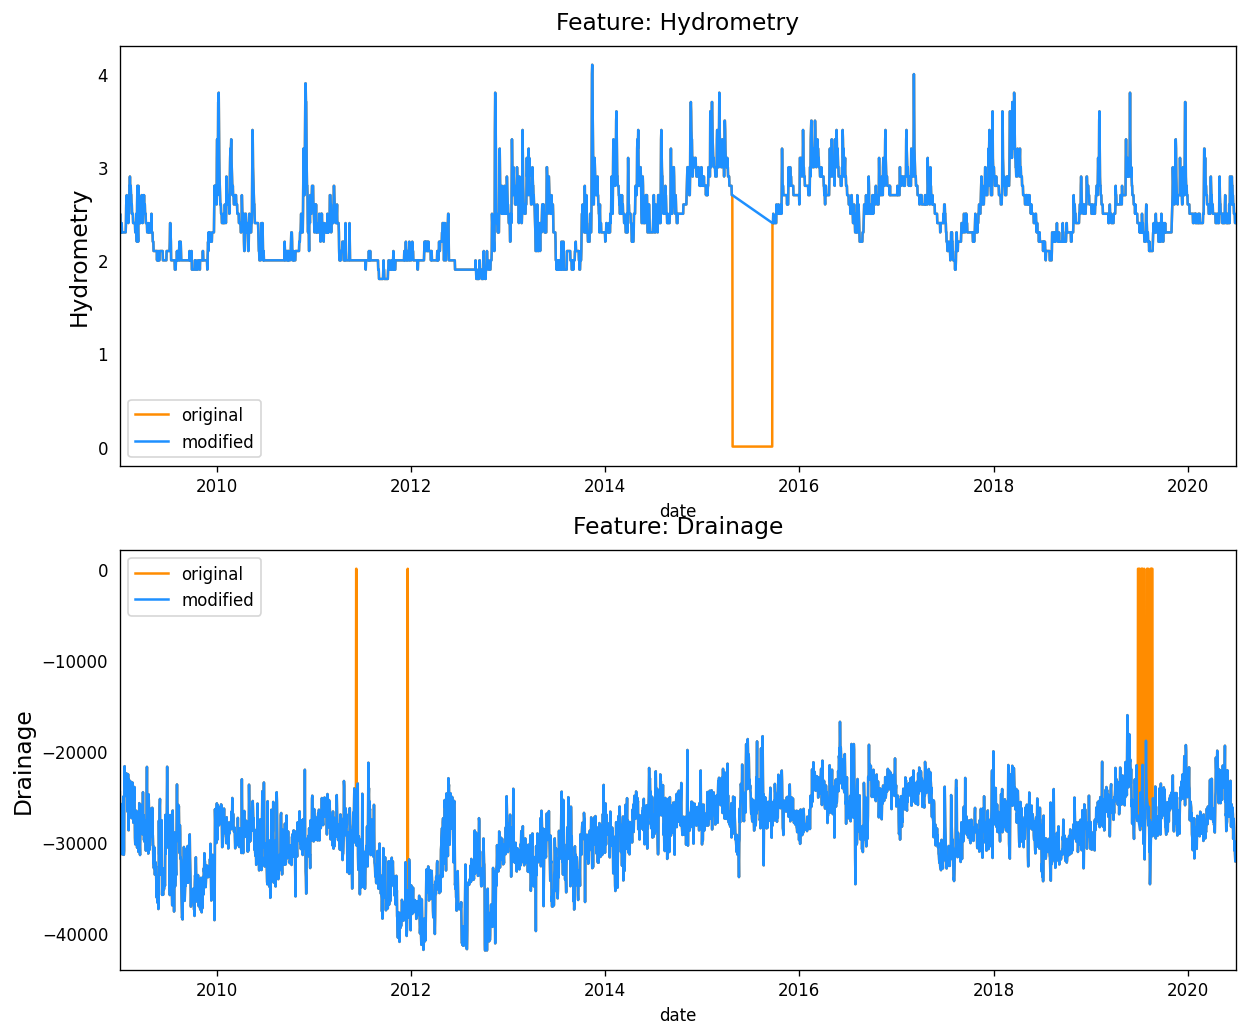

In [38]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

old_hydrometry = df['river_hydrometry'].copy()
df['rh_full'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['rh_full'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['dv_full'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['dv_full'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

**Vì vậy bây giờ chúng ta phải sửa các giá trị thiếu. Hãy xem xét những trường hợp này và tìm hiểu chúng ta có thể làm gì với chúng.**


<ipython-input-39-9c7e132a3916>:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


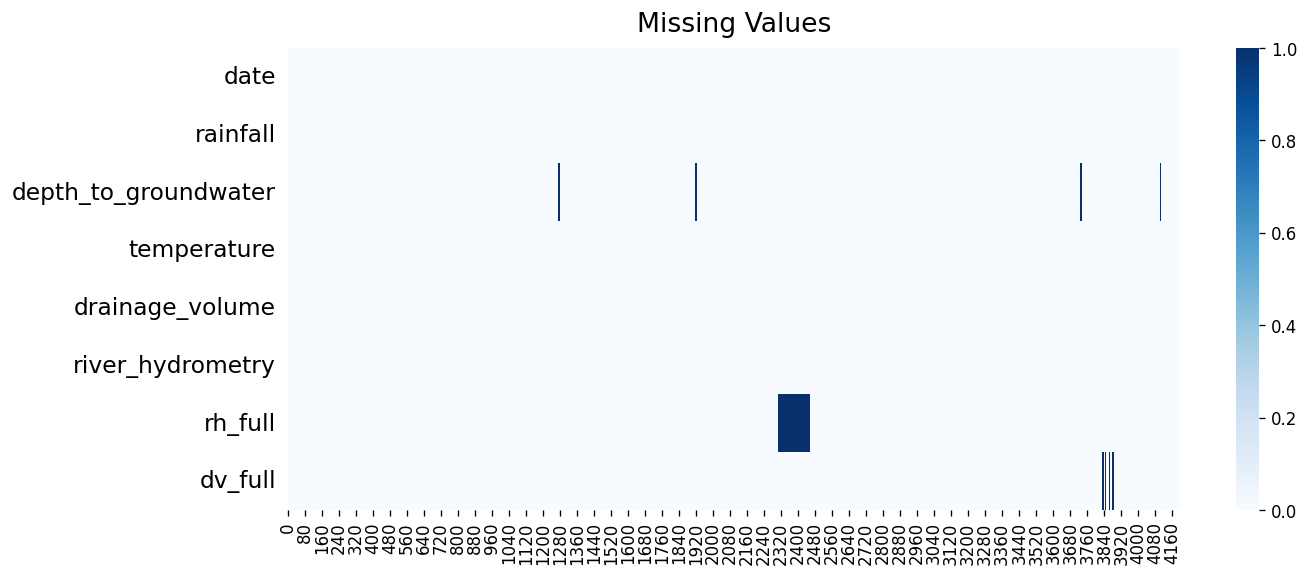

In [39]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()


**Tùy chọn 1: Điền NaN với giá trị ngoại lai (Outlier) hoặc 0**

- Trong ví dụ cụ thể này, điền giá trị bị thiếu bằng giá trị ngoại lai như np.inf hoặc 0 dường như là một ý tưởng rất ngây thơ. Tuy nhiên, sử dụng các giá trị như -999, đôi khi là một ý tưởng tốt.



**Tùy chọn 2: Điền NaN với giá trị trung bình**

- Điền NaN bằng giá trị trung bình cũng không đủ và ngây thơ, và không có vẻ là một lựa chọn tốt.




**Tùy chọn 3: Điền NaN với Giá trị cuối cùng với .ffill()**

- Điền NaN bằng giá trị cuối cùng (last value) có thể tốt hơn một chút.


**Tùy chọn 4: Điền NaN bằng giá trị nội suy tuyến tính với .interpolate()**

- Điền NaN bằng các giá trị được nội suy là tùy chọn tốt nhất trong ví dụ nhỏ này nhưng yêu cầu có kiến thức về giá trị lân cận.


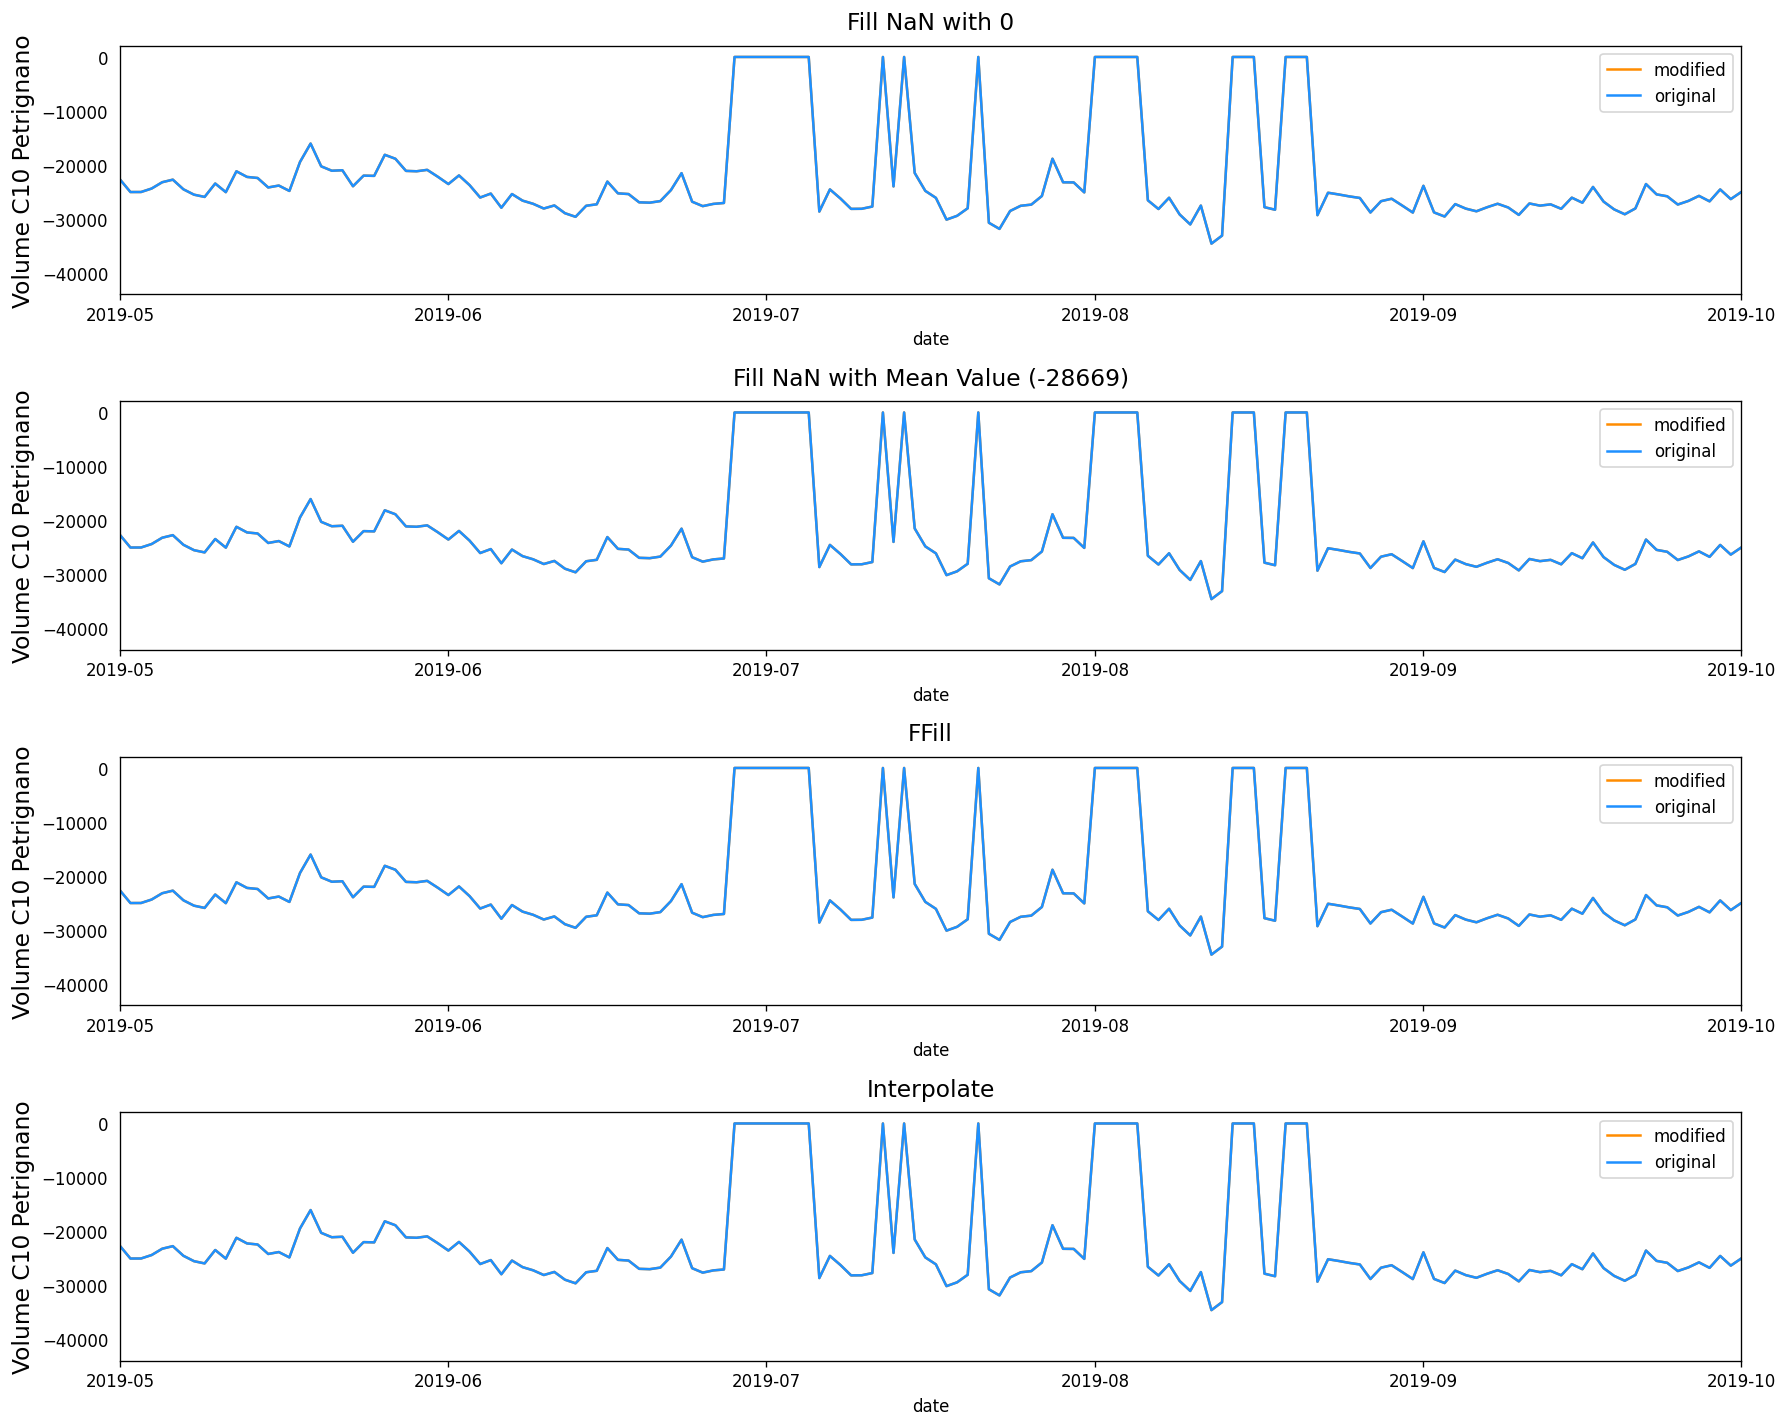

In [40]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
plt.show()

**Như chúng ta có thể thấy, lựa chọn tốt nhất trong trường hợp này là sử dụng phương pháp nội suy, dường như là lựa chọn tốt nhất!**



In [41]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

https://viblo.asia/p/tan-man-mot-chut-ve-time-series-data-p1-1VgZv6DpZAw

https://phamdinhkhanh.github.io/2020/02/17/ImbalancedData.html

https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

https://medium.com/enjoy-algorithm/pre-processing-of-time-series-data-c50f8a3e7a98

https://www.youtube.com/watch?v=7_Js8h709Dw

https://towardsdatascience.com/cleaning-financial-time-series-data-with-python-f30a3ed580b7


# **References**

1.	https://www.machinelearningplus.com/time-series/time-series-analysis-python/
2.	https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
3.	https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
4.	https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3
5. https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook
6. https://www.machinelearningplus.com/time-series/time-series-analysis-python/

